<a href="https://colab.research.google.com/github/sener7106/TiL/blob/main/ML_220117_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

- Decision Tree의 단점을 개선하기 위한 알고리즘 중 하나
- Decision Tree의 확장

- 데이터 분류, 군집, 특성의 중요성 확인, 데이터의 예측 등에 활용

- 분류 -> 지도학습, 종속 변수 있음, 예측 분류 하고 싶은 칸이 존재 , 종속 변수를 기준으로 분류

- 군집(Clustering) -> 비지도 학습, 종속 변수가 존재하지 않음
ex) 논문 1000개가 있는데 봐도 어떤 논문이랑 어떤 논문이 비슷한지 종속변수를 모르기 때문에 군집을 통해 분류해주는 작업이 필요.. 잠재적 디리클레 할당(Latent Dirichlet Allocation : LDA) 

## Random Forest의 특징

- 여러개의 Decision Tree 결합으로 단일 트리의 결점을 극복
- Overfitting 문제가 적음
- 구현이 간다하고, 병렬 계산이 간편하다.
- 기본 트리를 100개, CPU를 100개로 쪼개고 동시에 실행(Multi-Thread)


- R.F에서의 2가지 random
1) Dataset에서의 샘플 데이터를 random으로 선택
2) 선택한 샘플 데이터로 Decision Tree 생성

- 선택한 샘플 데이터에서 랜덤으로 f개의 feature를 선택
- 선택하는 feature의 개수는 기본으로 sqrt(전체 feature 수) , 선택으로 log2(전체 feature 수)를 방법으로 계산

if sqrt(10000) ~= 13.28 칸 선택

## Bootstrap 
데이터에서 얻어진 통계량의 표본오차를 확률 분포의 가정을 두지 않고 논 파라메트릭(non-para-metric)하게 평가하기 위한 하나의 방법. 이 방법에서는 주어진 데이터세트를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출로 복수의 자료를 작성하고 각각에서 얻어진 통계량을 계산함. 계통추정론의 분야에서 계통수의 신뢰성을 평가할 목적으로 널리 사용되고 있음.
[네이버 지식백과] 부트스트랩 [bootstrap] (해양과학용어사전, 2005. 10. 7., 한국해양학회)


- Random Foreset 는 랜덤하게 feauture를 뽑아 Gini Impurity 를 비교한다.


## Voting 하기

# Random Forest - IRIS 데이터 분류

- 1. 1976년 보스턴 집값 데이터 : load_boston()
- 2. 꽃 데이터 : load_iris()
- 3. 인디언 당뇨병 데이터 : load_diabeetes()
- 4. 손글씨 숫자 이미지 : load_digits()
- 5. 운동 데이터 : load_linnerud()
- 6. 와인 데이터 : load_wine()
- 7. load_breast_cancer()

In [57]:
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
import sklearn.metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
#loading the iris ddataset
iris = load_iris()
# training data 설정
X_train = iris.data[:-30]
y_train = iris.target[:-30]
# test data 설정

X_test = iris.data[-30:] #test feature data
y_test = iris.target[-30:] #test target data

iris.keys()
# iris.data : iris data에서 feature 데이터를 호출
#iris.target : iris data에서 target 데이터를 호출
# dictionary 형태로 호출

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [47]:
print(y_train, y_test)

# test data의 target은 전부 2 (virginica)
# 훈련 셋과 테스트 셋의 분리가 잘 되지 않음

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2] [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [48]:
#RandomForestClassifier 클래스 import
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10)
rfc
# Sklearn.ensemble 모듈은 분류, 회귀 및 이상 탐지를 위한 ensemble-based 방법을 포함


RandomForestClassifier(n_estimators=10)

- 변수 설명 
 n_estimators : Decision Tree의 개수(default = 10)
 max_featrues : 최대 고려하는 feature의 개수(default = auto)
 oob_score : out-of-bag(OOB) 사용 여부 (default = False)

In [83]:
rfc.estimators_[8]

DecisionTreeClassifier(max_features='auto', random_state=550560713)

In [97]:
from sklearn import tree
from IPython.display import Image
import pydotplus
dt_dot_data = tree.export_graphviz(
    rfc.estimators_[8],
    feature_names = ["sepal length", "sepal width", "petal length", "petal width"], # 독립변수 칸이름
    class_names = ["setosa", "virsicolor", "virsinica"] # 종속변수 이름
)

dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)


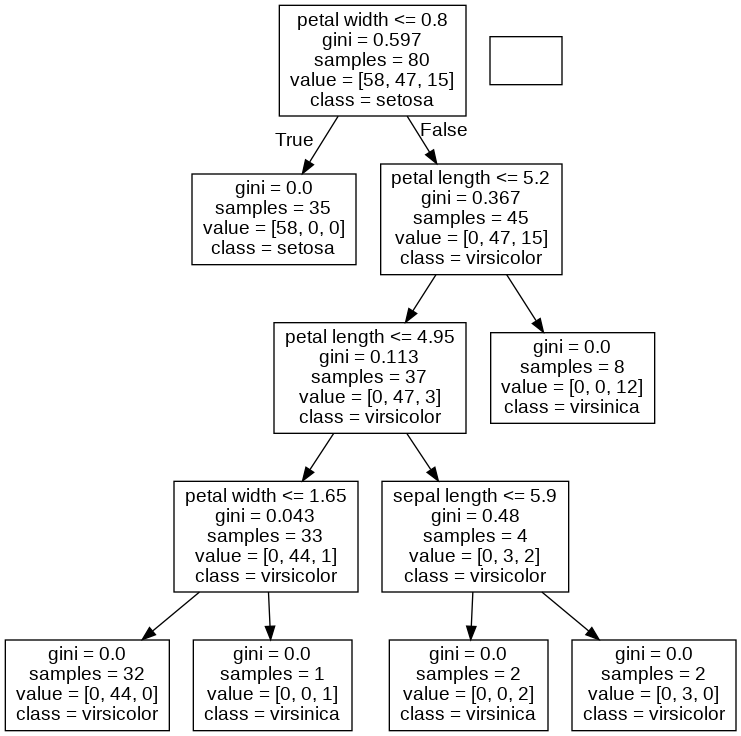

In [98]:
Image(dt_graph.create_png())

In [100]:
dt_graph.write_pdf("8번 째 트리 간직할래요.pdf")

True

In [66]:
rfc.fit(X_train, y_train)
# test_Data를 입력하여 target_data를 예측

prediction = rfc.predict(x_test)
# 예측 결과 precision 과 실제 test data 의 target 을 비교
print(prediction == y_test)
# 랜덤 포레스트 분류기 성능 평가
rfc.score(X_test, y_test)

[ True False  True False  True  True False False  True  True  True  True
  True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True]


0.8

### 순서

- 1. 훈련데이터를 입력해 RFC학습
- 2. 분류기에 테스트 데이터를 입력해 목표 값을 예측하여 분류
- 3. 분류(예측)한 목표 값과 실제 목표 값을 비교하고 출력


### 성능평가

- sklearn.metrics : scikit-learn 패키지 중 모듈 성능 평가방법 모듈
- accuracy_score() : 분류 결과의 accuracy를 계산.
- classification_report() : 분류 결과의 precision, recall 을 계산

- y_test(테스트 데이터의 target data), prediction(테스트 데이터의 target 예측 값)

In [70]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [78]:
print("Accuracy is :", accuracy_score(prediction, y_test))
print(classification_report(y_test, rfc.predict(X_test)))

Accuracy is : 0.8
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.80      0.89        30

    accuracy                           0.80        30
   macro avg       0.50      0.40      0.44        30
weighted avg       1.00      0.80      0.89        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
